In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

In [37]:
from subprocess import check_output

In [38]:
f = pd.read_csv('data/KaggleV2-May-2016.csv')
df = pd.DataFrame(f)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [39]:
#Manipulate data that can be used in analysis process.

df.rename(columns={"No-show" : "No_show"}, inplace=True)
df.drop(df[df.Handcap.isin([2,3,4])].index, inplace=True)

df = df[(df['Age'] < 100) & (df['Age'] > 0)]

In [40]:
df['No_show'] = df['No_show'].str.replace('No', '1')
df['No_show'] = df['No_show'].str.replace('Yes', '0')
df['No_show'] = df['No_show'].astype(int)

In [41]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,1
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,1
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,1
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,1


In [42]:
#Calculate Waiting time

df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ").date())
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ").date())
df['Waiting_time'] = (df['AppointmentDay'] - df['ScheduledDay']).astype('timedelta64[D]')
total_of_patient = len(df)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Waiting_time
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0.0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0.0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0.0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0.0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0.0


In [43]:
def calculate_percentage(name, df):
    if name == 'No_show':
        yes, no = df[name].value_counts()
        print('percentage of patients no show : {}%'.format(no/total_of_patient * 100))
        print('percentage of patients show up : {}%'.format(yes/total_of_patient * 100))
    else:
        not_have, have = df[name].value_counts()
        print('percentage of patients not have {} : {}%'.format(name, not_have/total_of_patient * 100))
        print('percentage of patients have {} : {}%'.format(name, have/total_of_patient * 100))

In [44]:
columns=['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','No_show']
for name in columns:
    calculate_percentage(name,df)

percentage of patients not have Scholarship : 89.89389100649015%
percentage of patients have Scholarship : 10.106108993509839%
percentage of patients not have Hipertension : 79.66322335334388%
percentage of patients have Hipertension : 20.336776646656116%
percentage of patients not have Diabetes : 92.60140292385064%
percentage of patients have Diabetes : 7.398597076149358%
percentage of patients not have Alcoholism : 96.86074716465156%
percentage of patients have Alcoholism : 3.139252835348436%
percentage of patients not have Handcap : 98.09415885443494%
percentage of patients have Handcap : 1.905841145565056%
percentage of patients not have SMS_received : 67.6559558706463%
percentage of patients have SMS_received : 32.3440441293537%
percentage of patients no show : 20.26279067589462%
percentage of patients show up : 79.73720932410538%


In [49]:
# This function will calculate all percentge

def calculate_percentage_females(name, df_f):
    if name == 'No_show':
        yes, no = df_f[name].value_counts()
        no_percentage = no/total_of_patient * 100
        yes_percentage = yes/total_of_patient * 100
    
        print('percentage of female No show : {}%'.format(no_percentage))
        print('percentage of female show up : {}%'.format(yes_percentage))
        return yes, no
    else:
        not_have, have = df_f[name].value_counts()
        not_have_percentage = not_have/total_of_patient * 100
        yes_have_percentage = have/total_of_patient*100
        
        print('percentage of female Not have {} : {}%'.format(name, not_have_percentage))
        print('percentage of female have {} : {}%'.format(name, yes_have_percentage))
        return not_have, have

In [50]:
columns=['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','No_show']
df_f = df[df['Gender'] == 'F']
for name in columns:
    no, yes = calculate_percentage_females(name, df_f)

percentage of female Not have Scholarship : 57.303539151689975%
percentage of female have Scholarship : 8.253650130646113%
percentage of female Not have Hipertension : 51.23856261179842%
percentage of female have Hipertension : 14.318626670537663%
percentage of female Not have Diabetes : 60.331344765258436%
percentage of female have Diabetes : 5.225844517077648%
percentage of female Not have Alcoholism : 64.41181153244612%
percentage of female have Alcoholism : 1.1453777498899576%
percentage of female Not have Handcap : 64.45582850239285%
percentage of female have Handcap : 1.1013607799432463%
percentage of female Not have SMS_received : 43.33330211562415%
percentage of female have SMS_received : 22.223887166711933%
percentage of female No show : 13.341824550230855%
percentage of female show up : 52.21536473210523%


Text(0.5, 0, 'Neighbourhood')

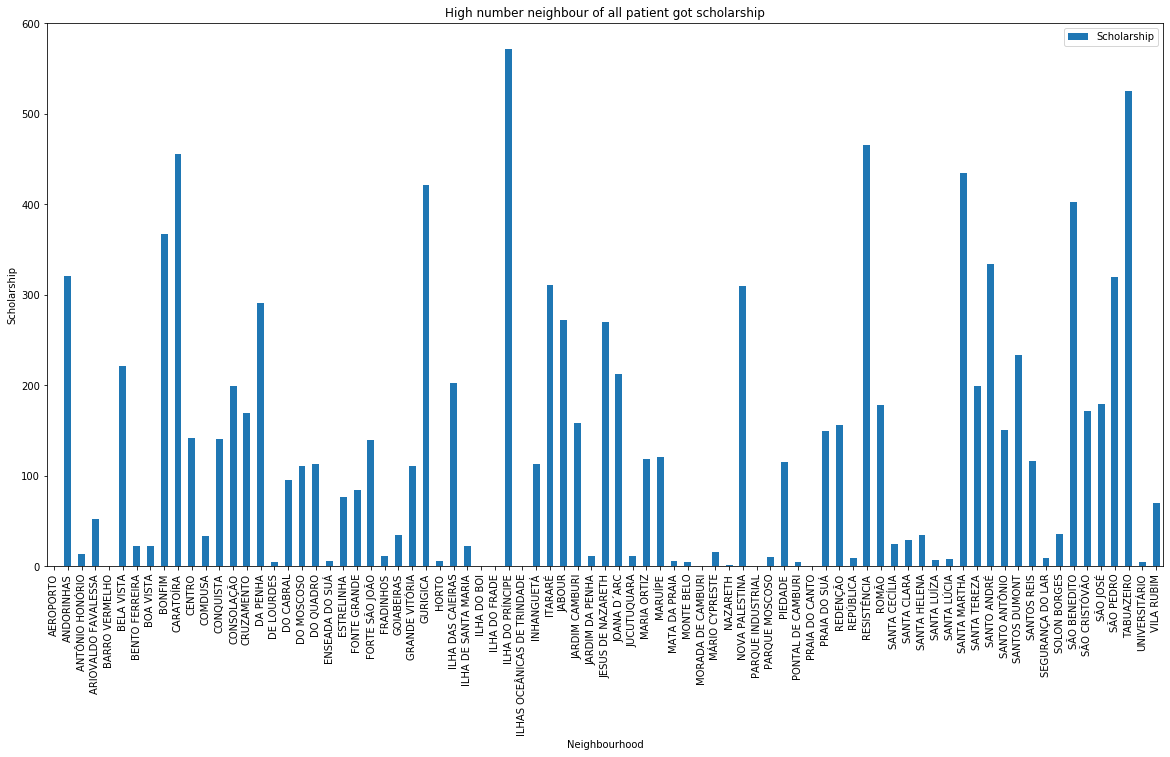

In [61]:
#Neighbourhood which receiving high no of scholarship

data = df[['Neighbourhood', 'Scholarship']]
Neighbourhood_group = data.groupby(['Neighbourhood'])
total_results = Neighbourhood_group.sum()
total_results.sort_values('Scholarship', ascending=False)

total_results.plot(kind='bar', figsize=(20,10), title="High number neighbour of all patient got scholarship")
plt.ylabel('Scholarship')
plt.xlabel('Neighbourhood')

Text(0, 0.5, 'Scholarship')

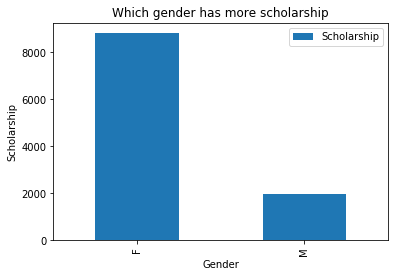

In [62]:
#Which gender had more scholarship

data = df[['Gender','Scholarship']]
gender_group = data.groupby(['Gender'])
total_gender = gender_group.sum()
total_gender.plot(kind='bar', title='Which gender has more scholarship')
plt.ylabel('Scholarship')

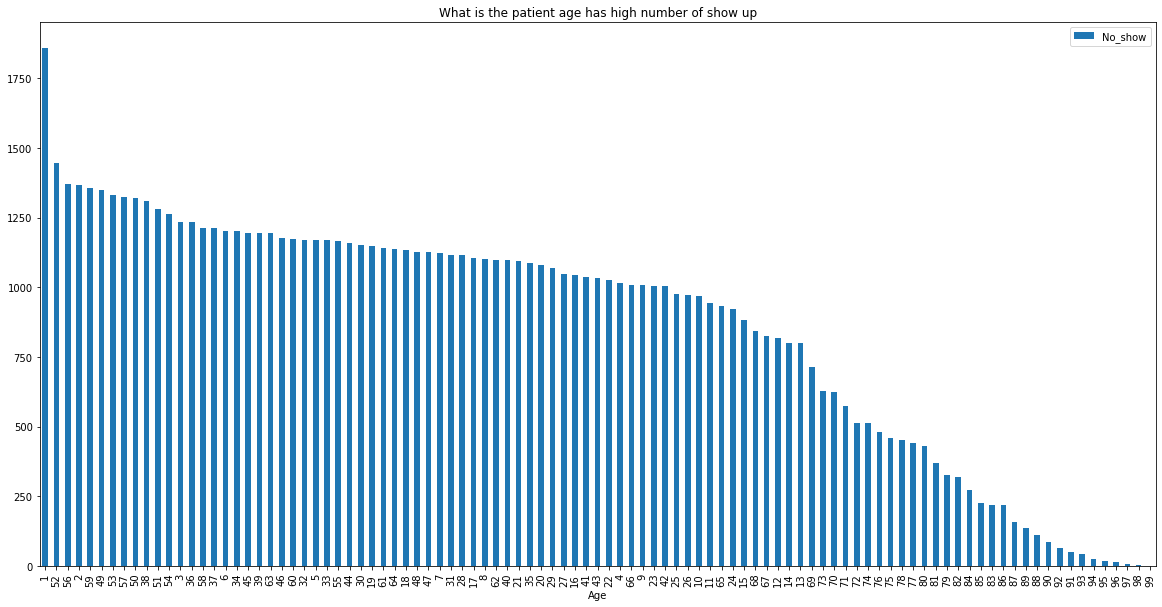

In [63]:
#Patient age had high number of show up

no_show_data = df[['No_show', 'Age', 'Gender']]
Age_df = no_show_data.groupby(['Age']).sum()
Age_df.sort_values('No_show', ascending=False, inplace=True)
Age_df.plot(kind='bar', figsize=(20, 10), stacked=True, title='What is the patient age has high number of show up')

Text(0, 0.5, 'No_show')

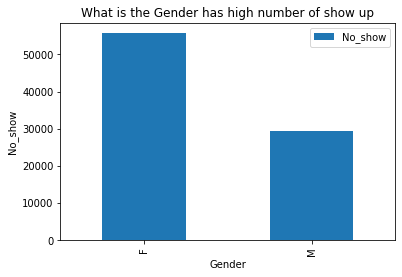

In [66]:
#Which Gender has high no of show up

data = df[['Gender', 'No_show']]
Age_df = data.groupby(['Gender']).sum()
Age_df.sort_values('No_show', ascending=False, inplace=True)
Age_df.plot(kind='bar', stacked=True, title='What is the Gender has high number of show up')
plt.ylabel('No_show')

Text(0, 0.5, 'Alcoholism')

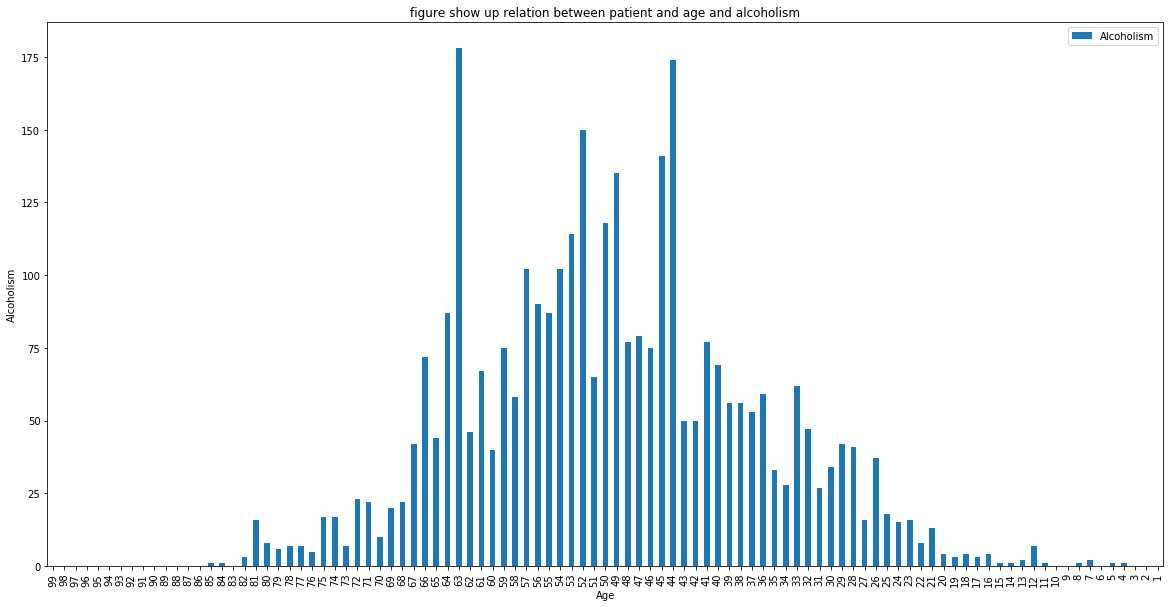

In [69]:
data = df[['Age','Alcoholism']]
alcoh_df = data.groupby(['Age']).sum()
alcoh_df.sort_values('Alcoholism', ascending=False, inplace=True)
alcoh_df.sort_values('Age', ascending=False, inplace=True)
alcoh_df.plot(kind='bar', figsize=(20, 10), title='figure show up relation between patient and age and alcoholism')
plt.ylabel('Alcoholism')

Text(0, 0.5, 'No_show')

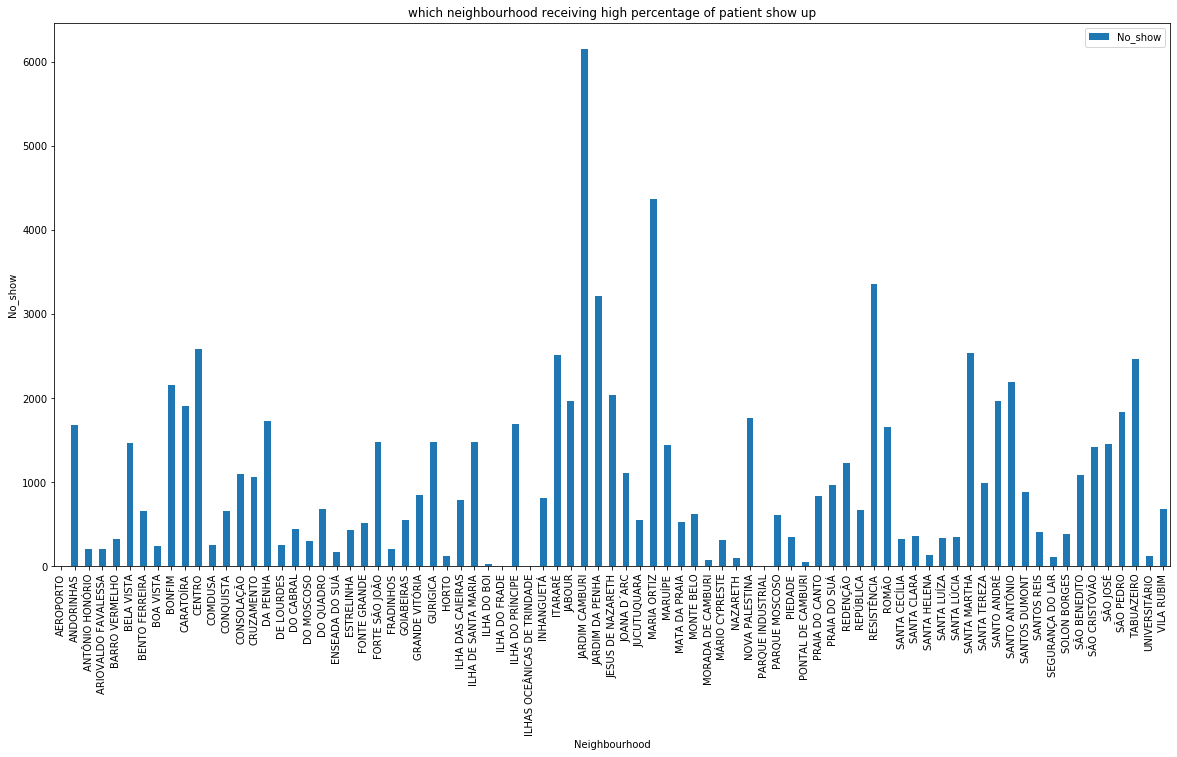

In [70]:
#Which Neighbourhood reciving high percentage of patient show up

data = df[['Neighbourhood','No_show']]
neigh_df = data.groupby('Neighbourhood').sum()
neigh_df.plot(kind='bar', figsize=(20, 10), title='which neighbourhood receiving high percentage of patient show up')
plt.ylabel('No_show')

Text(0, 0.5, 'SMS_received / No_show')

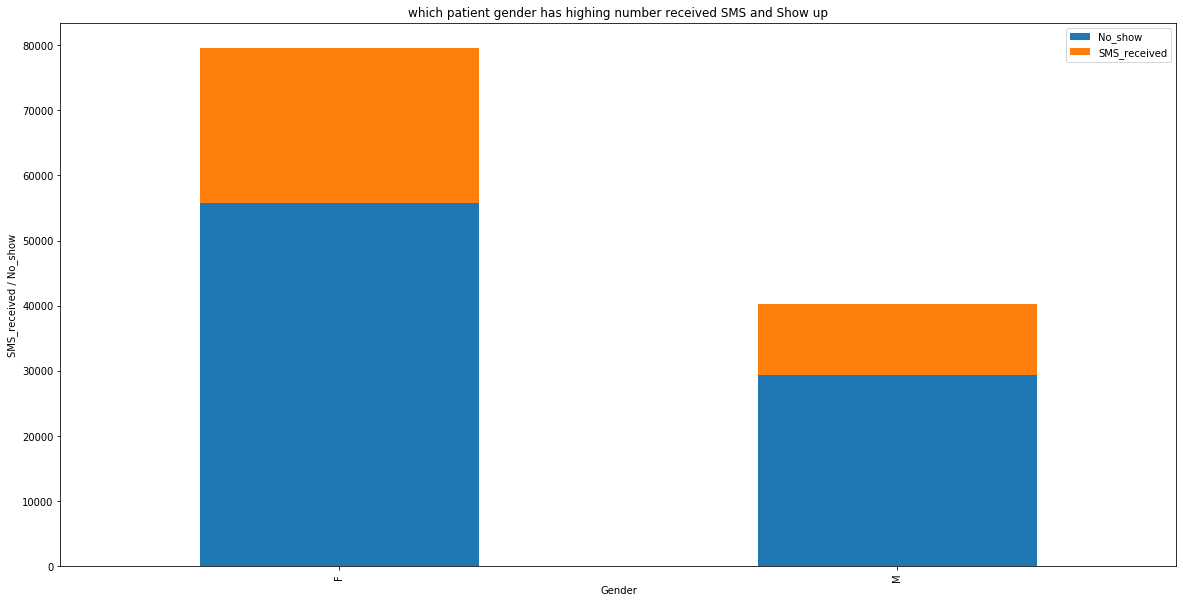

In [71]:
#the percentage of patient had received high number SMS and show up associated with patient gender

data = df[['No_show', 'SMS_received', 'Gender']]
age_df = data.groupby('Gender').sum()
age_df.plot(kind='bar', figsize=(20, 10), stacked=True, title='which patient gender has highing number received SMS and Show up')
plt.ylabel('SMS_received / No_show')


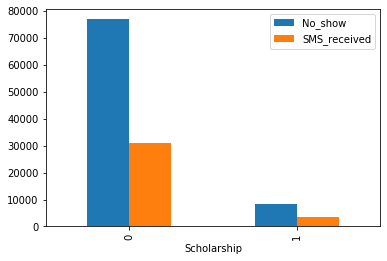

In [72]:
# Find Relation between No of patients have scholarship and received SMS and show up

data = df[['No_show', 'Scholarship', 'SMS_received']]
Scholarship_show = data.groupby('Scholarship').sum()
Scholarship_show.plot(kind='bar')

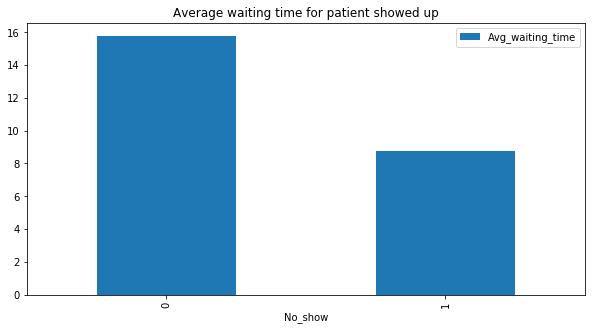

In [74]:
s_df = df[['No_show','Waiting_time']]
result_s_df = s_df.groupby(['No_show']).mean()
result_s_df.rename(columns={'Waiting_time':'Avg_waiting_time'}, inplace=True)
result_s_df.sort_values('Avg_waiting_time', ascending=False, inplace=True)
result_s_df.plot(kind='bar', figsize=(10, 5), stacked=True, title='Average waiting time for patient showed up')